# Machine Learning Project
### Spring 2024
## Predicting Credit Card Account Cancellations

<br>
<br>
<p align="center">
<img 
  src="./files/credit_cards.png" 
  alt="Car Accident" 
  width="500"
  height="350"
/>
</p>

<br>

## Introduction
This is an individual assignment and will be a chance for you to perform an applied data science project on a real data set. 

We will be working with the `credit_card_df` data frame in this project. This data set contains information on over 4,000 customers of a U.S. bank. The description of this data and the variables contained in it are provided below.

The objective of this project is to explore the factors that lead to customers canceling their credit card accounts and develop machine learning algorithms that will predict the likelihood of a customer canceling their account in the future.

## Credit Card Account Data

The `credit_card_df` data frame contains information on the customers of a large U.S. bank which provides a number of financial services including multiple credit card offerings. 

The bank is looking to see if it can determine the factors that lead to customers canceling their credit card account and whether it can predict if a customer will cancel their account in the future. 

To maintain profits, banks must maximize the number of customers with credit lines. It is also in their best interests for customers to carry large credit card balances from month-to-month to maximize revenue from interest charges.

The bank has experienced record levels of customers closing their credit accounts in the past couple of years and this is leading to declining revenue.

The bank's goal is to become better at identifying customers at risk of canceling their account to minimize financial losses.

Specifically, the broad questions that the company is trying to answer include:

<br>

- What are the factors that are associated with customers closing their credit card accounts?
- Is it possible to predict whether a customer will close their account? If so, how accurate are the predictions?
  - How many costly errors is the model expected to produce?
- Are there any actions or policies the company can implement to reduce the risk of losing their customers?

<br>

The data set contains a mixture of customer demographics and their financial behavior.

The outcome variable in this data is `customer_status`. This variable records whether a customer eventually closed their account and indicates a financial loss to the company.

**Note**: The outcome variable has been coded as a factor with 'closed_account' (**the positive class**) as the first level. This is the format that `tidymodels` expects for calculating model performance metrics. There is no need to recode this variable in your machine learning process.

<br>

### Data Definitions

| Variable            	     | Definition                                 	                | Data Type    |
|:---------------------------|:-------------------------------------------------------------|:-------------|
| customer_status            | Customer status (closed account or active)                   | Factor       |
| age                        | Customer age                                                 | Numeric      |
| dependents                 | Number of dependents in household                            | Numeric      |
| education                  | Customer education level                                     | Factor       |
| marital_status             | Marital status                                               | Factor       |
| employment_status          | Employment status                                            | Factor       |
| income                     | Annual income (US Dollars)                                   | Numeric      |
| card_type                  | Type of credit card                                          | Factor       |
| months_since_first_account | Months since first credit card account activated             | Numeric      |
| total_accounts             | Total accounts (credit checking and savings)                 | Numeric      |
| months_inactive_last_year  | Months without credit card activity last year                | Numeric      |
| contacted_last_year        | Number of times contacted last year by sales representatives | Numeric      |
| credit_limit               | Current credit limit                                         | Numeric      |
| utilization_ratio          | Average monthly balance to credit limit                      | Numeric      |
| spend_ratio_q4_q1          | Ratio of total Q4 to Q1 spending last year                   | Numeric      |
| total_spend_last_year      | Total amount charged last year                               | Numeric      |
| transactions_last_year     | Number of transactions last year                             | Numeric      |
| transaction_ratio_q4_q1    | Ratio of total Q4 to Q1 transactions last year               | Numeric      |

In [78]:
# Load data
library(tidyverse)

credit_card_df <- readRDS(url('https://gmubusinessanalytics.netlify.app/data/credit_card_df.rds'))

In [79]:
# View data
credit_card_df

customer_status,age,dependents,education,marital_status,employment_status,income,card_type,months_since_first_account,total_accounts,months_inactive_last_year,contacted_last_year,credit_limit,utilization_ratio,spend_ratio_q4_q1,total_spend_last_year,transactions_last_year,transaction_ratio_q4_q1
<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
closed_account,46,3,masters,married,self_employed,67807,blue,36,2,3,4,4267,0.000,0.862,1067,23,0.769
closed_account,46,3,associates,married,self_employed,51785,blue,34,2,3,2,8583,0.000,0.358,1794,31,0.292
closed_account,44,4,masters,single,part_time,105643,gold,36,5,3,2,2367,0.678,0.956,4506,59,0.639
closed_account,62,1,masters,single,part_time,34138,gold,56,1,2,1,3109,0.000,1.054,5470,72,0.674
closed_account,38,1,masters,married,full_time,36264,blue,20,2,2,3,1621,0.358,0.421,1893,41,0.171
closed_account,43,3,associates,single,part_time,84234,blue,30,3,2,4,11336,0.000,0.691,1809,39,0.345
active,43,2,masters,married,full_time,35379,blue,35,3,1,3,4092,0.152,0.775,5001,88,0.492
closed_account,39,3,associates,married,part_time,67047,blue,29,4,3,4,2187,0.000,0.467,2031,40,0.333
active,54,1,masters,single,full_time,35903,gold,47,6,3,4,12873,0.000,1.005,3170,70,0.842


# Exploratory Data Analysis (50 Points)

In this section, you must think of at least 5 relevant questions that explore the relationship between `customer_status` and the other variables in the `credit_card_df` data set. The goal of your analysis should be discovering which variables drive the differences between customers who do and do not close their account.

You must answer each question and provide supporting data summaries with either a summary data frame (using `dplyr`/`tidyr`) or a plot (using `ggplot`) or both.

In total, you must have a minimum of 3 plots (created with `ggplot`) and 3 summary data frames (created with `dplyr`) for the exploratory data analysis section. Among the plots you produce, you must have at least 3 different types (ex. box plot, bar chart, histogram, scatter plot, etc...)

Each question must be answered with **supporting evidence** from your tables and plots.

See the example question below.

### Sample Question
The sample below is from a previous semester where students analyzed a dataset, **employee_df**, with information on employees of a company and whether they decided to leave the company for another job.

The question, `R` code, and answer are examples of the correct style and language that you should use for your work.

### Question

*Is there a relationship between employees leaving the company and their current salary?*

**Answer**: Yes, the data indicates that employees who leave the company tend to have lower salaries when compared to employees who do not. Among the 237 employees that left the company, the average salary was \$76,625. This is over \$20,000 less than the average salary of employees who did not leave the company.

Among the employees *who did not leave the company*, only 10% have a salary that is less than or equal to \$60,000. When looking at employees who did leave the company, this increases to 34%.

### Supporting Table and Visualization

Note - the sample code and output below is an image, not code cells

<p align="center">
<img 
  src="https://gmubusinessanalytics.netlify.app/images/sample_table.jpg"
  width="650"
  height="auto"
/>
</p>

<br>
<br>
<br>

<p align="center">
<img 
  src="https://gmubusinessanalytics.netlify.app/images/sample_plot.jpg"
  width="650"
  height="auto"
/>
</p>


## Question 1


**Question**:
Is there a relationship between customer age and account closure?


**Answer**:
Yes, there appears to be a relationship between customer age and account closure. On average, customers who closed their accounts are slightly older, with an average age of 46.56 years, compared to those who kept their accounts open, with an average age of 46.22 years.


## Supporting Analysis

In [80]:
# This code adjusts the figure output size in the notebook
options(repr.plot.width=11, repr.plot.height=8)

# A tibble: 2 × 2
  customer_status average_age
  <fct>                 <dbl>
1 closed_account         46.6
2 active                 46.2


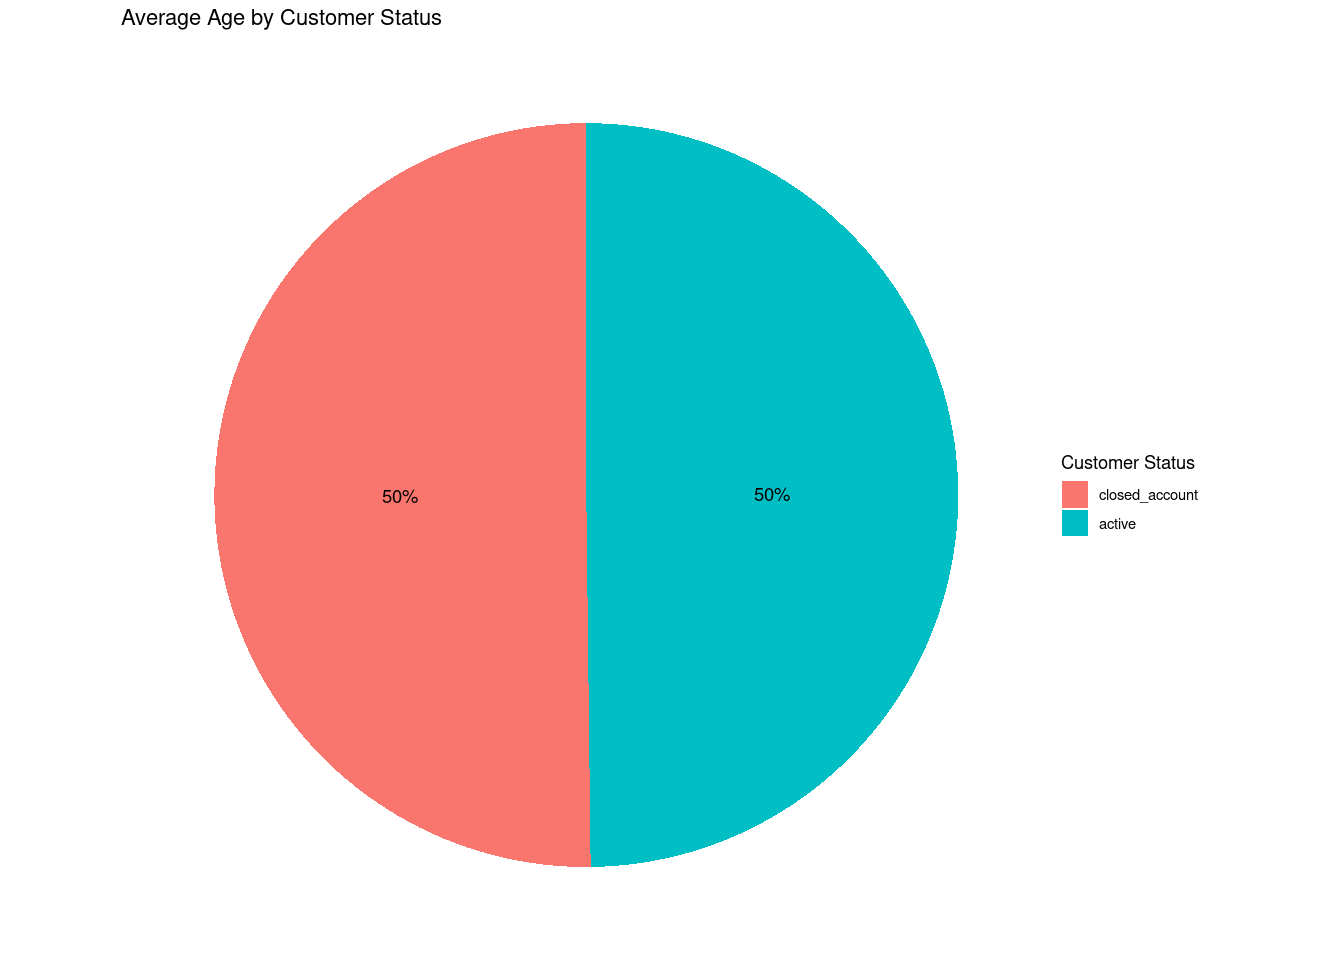

In [81]:
# Calculate total count for each customer status
total_counts <- credit_card_df %>%
  count(customer_status)

# Calculate average age by customer status
age_summary <- credit_card_df %>%
  group_by(customer_status) %>%
  summarize(average_age = mean(age))
print(age_summary)

# Combine data frames
age_summary <- merge(age_summary, total_counts, by = "customer_status")

# Calculate percentage
age_summary <- age_summary %>%
  mutate(percentage = average_age / sum(average_age) * 100)

# Pie Chart with percentage labels
ggplot(age_summary, aes(x = "", y = average_age, fill = customer_status, label = paste0(round(percentage), "%"))) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar(theta = "y") +
  labs(title = "Average Age by Customer Status",
       fill = "Customer Status",
       y = "Average Age",
       x = NULL) +
  geom_text(position = position_stack(vjust = 0.5)) +  # Add percentage labels
  theme_void()


## Question 2


**Question**:How does marital status relate to account closure?



**Answer**:

- Among the single customers, 20.40% closed their accounts, while 22.97% remained active.
- For married customers, 21.37% closed their accounts, while 27.60% remained active.
- Among the divorced customers, 3.44% closed their accounts, while 4.21% remained active.

This breakdown shows that marital status may indeed have an influence on account closure, with single and married individuals showing higher percentages of account closures compared to divorced individuals. However, the differences are not substantial, and further analysis may be needed to determine the underlying factors contributing to these patterns.


## Supporting Analysis


marital_status,customer_status,count,percent
<fct>,<fct>,<int>,<dbl>
single,closed_account,944,20.401988
single,active,1063,22.973849
married,closed_account,989,21.374541
married,active,1277,27.598876
divorced,closed_account,159,3.436352
divorced,active,195,4.214394


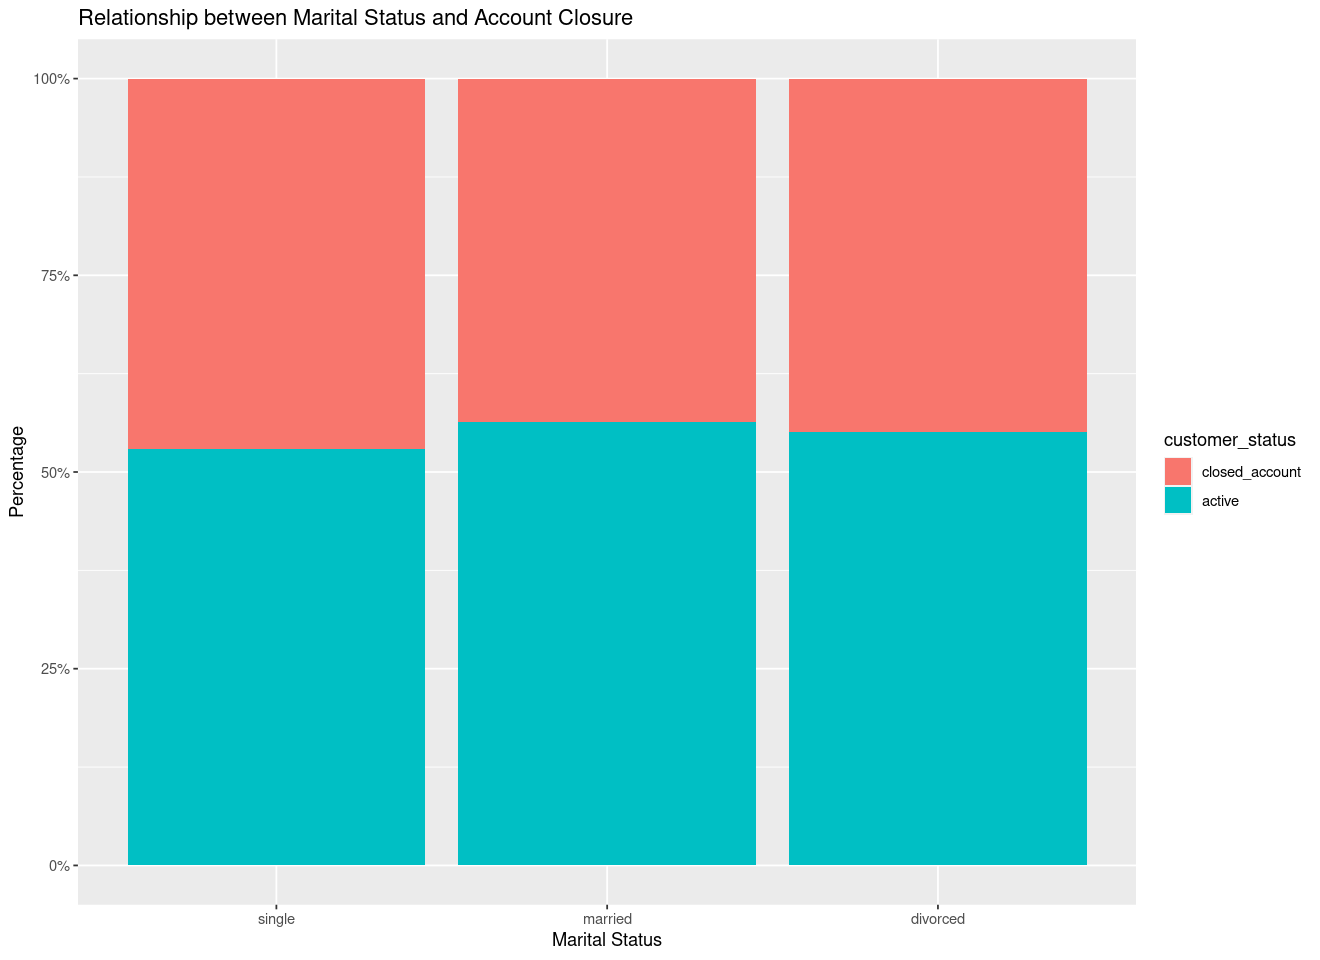

In [82]:
# Summary Data Frame
marital_summary <- credit_card_df %>%
  group_by(marital_status, customer_status) %>%
  summarize(count = n(), .groups = "drop") %>%
  mutate(percent = count / sum(count) * 100)

marital_summary


# Plot
ggplot(credit_card_df, aes(x = marital_status, fill = customer_status)) +
  geom_bar(position = "fill") +
  labs(title = "Relationship between Marital Status and Account Closure",
       x = "Marital Status",
       y = "Percentage") +
  scale_y_continuous(labels = scales::percent_format())



## Question 3


**Question**:What is the average income for customers with closed accounts versus active accounts?



**Answer**:
This question examines the income disparity between customers with closed and active accounts. On average, customers with closed accounts have an income slightly lower than active accounts .


## Supporting Analysis


In [83]:
library(dplyr)

# Calculating average income by customer_status
income_summary <- credit_card_df %>%
  group_by(customer_status) %>%
  summarise(average_income = mean(income))

income_summary


customer_status,average_income
<fct>,<dbl>
closed_account,61601.51
active,62842.83


## Question 4


**Question**:How does education level correlate with account closure?



**Answer**:This question helps us understand if there's any relationship between education level and closing accounts.


## Supporting Analysis


education,customer_status,count,percent
<fct>,<fct>,<int>,<dbl>
associates,closed_account,874,18.889129
associates,active,1053,22.757726
bachelors,closed_account,201,4.344067
bachelors,active,268,5.792090
masters,closed_account,891,19.256538
masters,active,1104,23.859952
doctorate,closed_account,126,2.723147
doctorate,active,110,2.377350


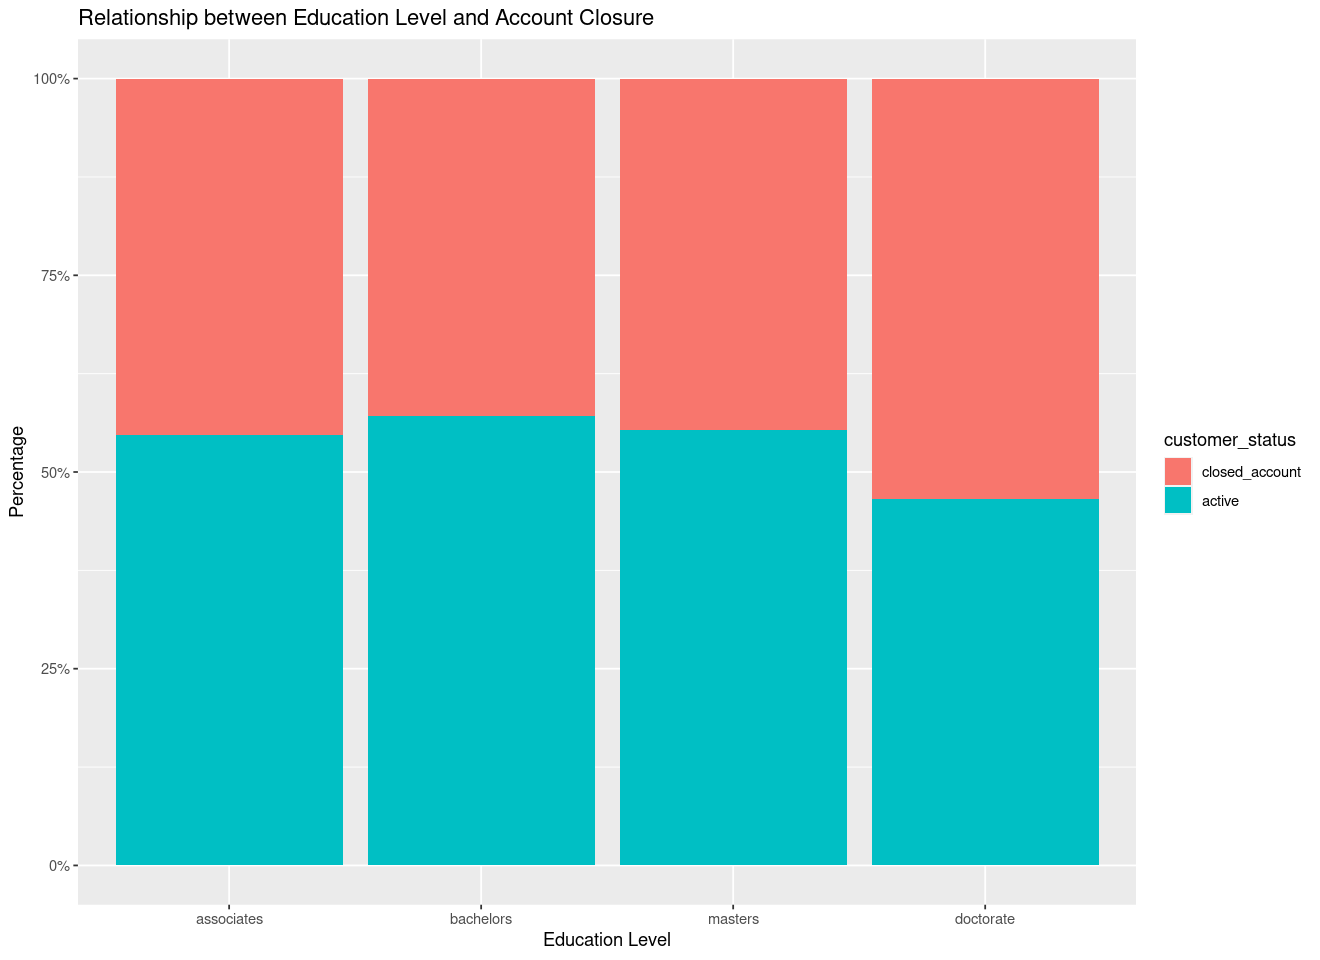

In [84]:
# Summary Data Frame
education_summary <- credit_card_df %>%
  group_by(education, customer_status) %>%
  summarize(count = n(), .groups = "drop") %>%
  mutate(percent = count / sum(count) * 100)

education_summary




# Plot
ggplot(credit_card_df, aes(x = education, fill = customer_status)) +
  geom_bar(position = "fill") +
  labs(title = "Relationship between Education Level and Account Closure",
       x = "Education Level",
       y = "Percentage") +
  scale_y_continuous(labels = scales::percent_format())






## Question 5


**Question**:Is there a difference in credit limit between customers with closed accounts and active accounts?



**Answer**:This question explores whether credit limit plays a role in account closure.Customers who closed their accounts tend to have lower average credit limits compared to those who kept their accounts open.



## Supporting Analysis


customer_status,average_credit_limit
<fct>,<dbl>
closed_account,8145.746
active,8794.175


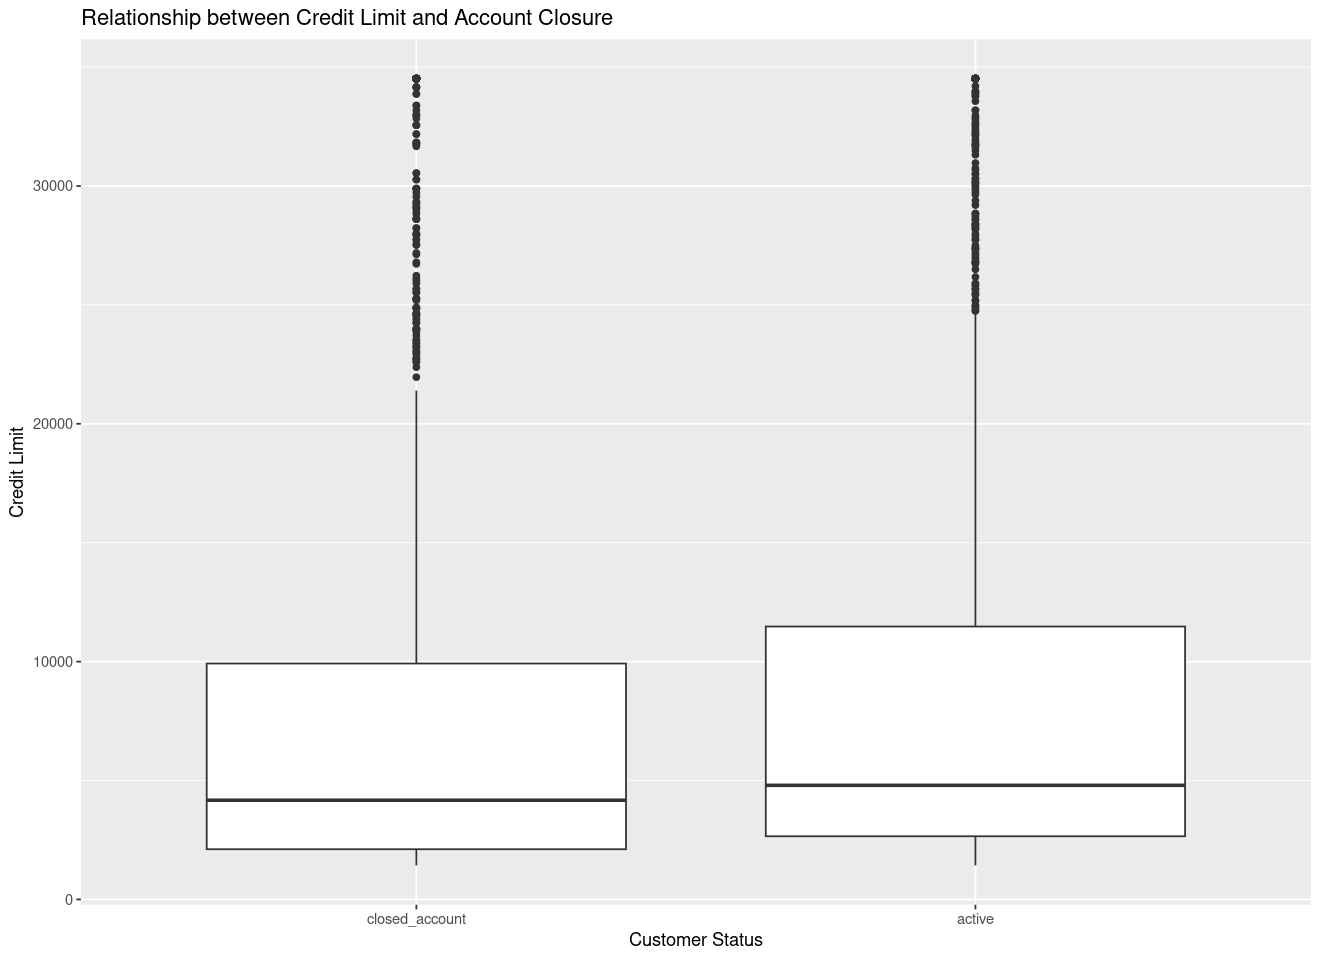

In [85]:
# Summary Data Frame
credit_limit_summary <- credit_card_df %>%
  group_by(customer_status) %>%
  summarize(average_credit_limit = mean(credit_limit))

credit_limit_summary

# Plot
ggplot(credit_card_df, aes(x = customer_status, y = credit_limit)) +
  geom_boxplot() +
  labs(title = "Relationship between Credit Limit and Account Closure",
       x = "Customer Status",
       y = "Credit Limit")



# Machine Learning Modeling (75 Points)
In this section of the project, you will fit **three classification algorithms** to predict the outcome variable,`customer_status`.

You must follow the machine learning steps below. 

The data splitting and feature engineering steps should only be done once so that your models are using the same data and feature engineering steps for training.

1. Split the `credit_card_df` data into a training and test set (remember to set your seed)
2. Specify a feature engineering pipeline with the `recipes` package
    - You can include steps such as skewness transformation, dummy variable encoding or any other steps you find appropriate
3. Specify a `parsnip` model object
    - You may choose from the following classification algorithms:
      - Logistic Regression
      - LDA
      - QDA
      - KNN
      - Decision Tree
      - Random Forest
4. Package your recipe and model into a workflow
5. Fit your workflow to the training data
    - If your model has hyperparameters:
      - Split the training data into 5 folds for 5-fold cross validation using `vfold_cv` (remember to set your seed)
      - Perform hyperparamter tuning with a random grid search using the `grid_random()` function
      - Refer to the following tutorial for an example - [Random Grid Search](https://gmubusinessanalytics.netlify.app/lesson-08-r-tutorial.html#Hyperparameter_Tuning14)
      - Hyperparameter tuning can take a significant amount of computing time. Be careful not to set the `size` argument of `grid_random()` too large. I recommend `size` = 10 or smaller.
      - Select the best model with `select_best()` and finalize your workflow
6. Evaluate model performance on the test set by plotting an ROC curve using `autoplot()` and calculating the area under the ROC curve on your test data

In [86]:
# Run this R code to install ML packages that you might need (Will take about 1 minute)
install.packages('vip')




Installing vip [0.4.1] ...
	OK [linked cache]


In [87]:
install.packages("rpart")

Installing rpart [4.1.23] ...
	OK [linked cache]


In [88]:
install.packages('topicmodels')

Installing topicmodels [0.2-16] ...
	OK [linked cache]


In [89]:
install.packages('parsnip')

Installing parsnip [1.2.0] ...
	OK [linked cache]


In [90]:
install.packages('pROC')

Installing pROC [1.18.5] ...
	OK [linked cache]


## Data Resampling
First split your data into training and test sets. If performing hyperparameter tuning, also create folds from your training data

In [91]:
library(tidymodels)
library(recipes)
library(vip)

library(rpart)
library(topicmodels)
library(discrim)
library(parsnip)
library('pROC')
library(ggplot2)

# Split the data
set.seed(123)
credit_card_split <- initial_split(credit_card_df, prop = 0.7, strata = "customer_status")
credit_card_train_data <- training(credit_card_split)
credit_card_test_data <- testing(credit_card_split)









## Feature Engineering Pipeline
Specify your feature engineering pipeline with the `recipes` package. You will use the pipeline when you create your modeling workflows below for each of your models.

In [92]:
credit_recipe <- recipe(customer_status ~ ., data = credit_card_train_data) %>%
  step_log(income, base = 10) %>%
  step_dummy(all_nominal(), -all_outcomes())


## Model 1 Training

In [93]:
# LDA Model

logic_model <- logistic_reg() %>%
  set_engine("glm") %>%
  set_mode("classification")

logic_workflow <- workflow() %>%
  add_recipe(credit_recipe) %>%
  add_model(logic_model)

fitted_logic_workflow <- logic_workflow %>% fit(credit_card_train_data)

## Model 1 Performance Evaluation

Setting levels: control = closed_account, case = active

Setting direction: controls < cases



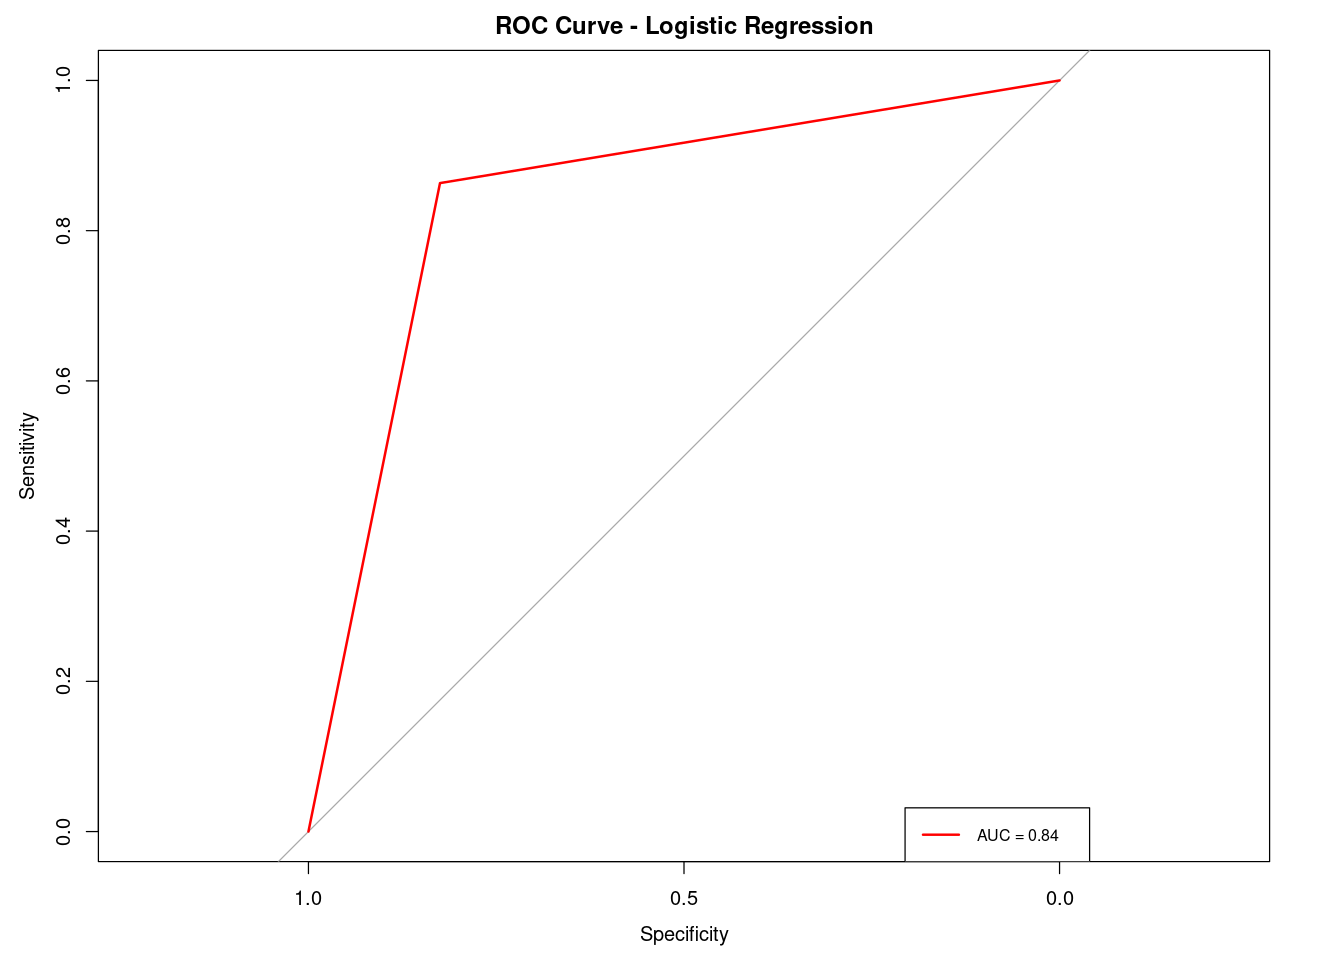

In [94]:
# Predictions on test data
test_predictions2 <- predict(fitted_logic_workflow, new_data = credit_card_test_data) %>%
  bind_cols(credit_card_test_data) %>%
  collect()

# ROC curve and AUC computation
roc_curve2 <- pROC::roc(test_predictions2$customer_status, as.numeric(test_predictions2$.pred_class))
auc_value2 <- pROC::auc(roc_curve2)

# Plot ROC curve
plot(roc_curve2, main = "ROC Curve - Logistic Regression", col = "red", lwd = 2)
legend("bottomright", legend = paste("AUC =", round(auc_value2, 2)), col = "red", lwd = 2, cex = 0.8)


## Model 2 Training

In [95]:
tree_model <- decision_tree() %>%
  set_engine("rpart") %>%
  set_mode("classification")

tree_workflow <- workflow() %>%
  add_recipe(credit_recipe) %>%
  add_model(tree_model)

fitted_tree_workflow <- tree_workflow %>% fit(credit_card_train_data)


## Model 2 Performance Evaluation

Setting levels: control = closed_account, case = active

Setting direction: controls < cases



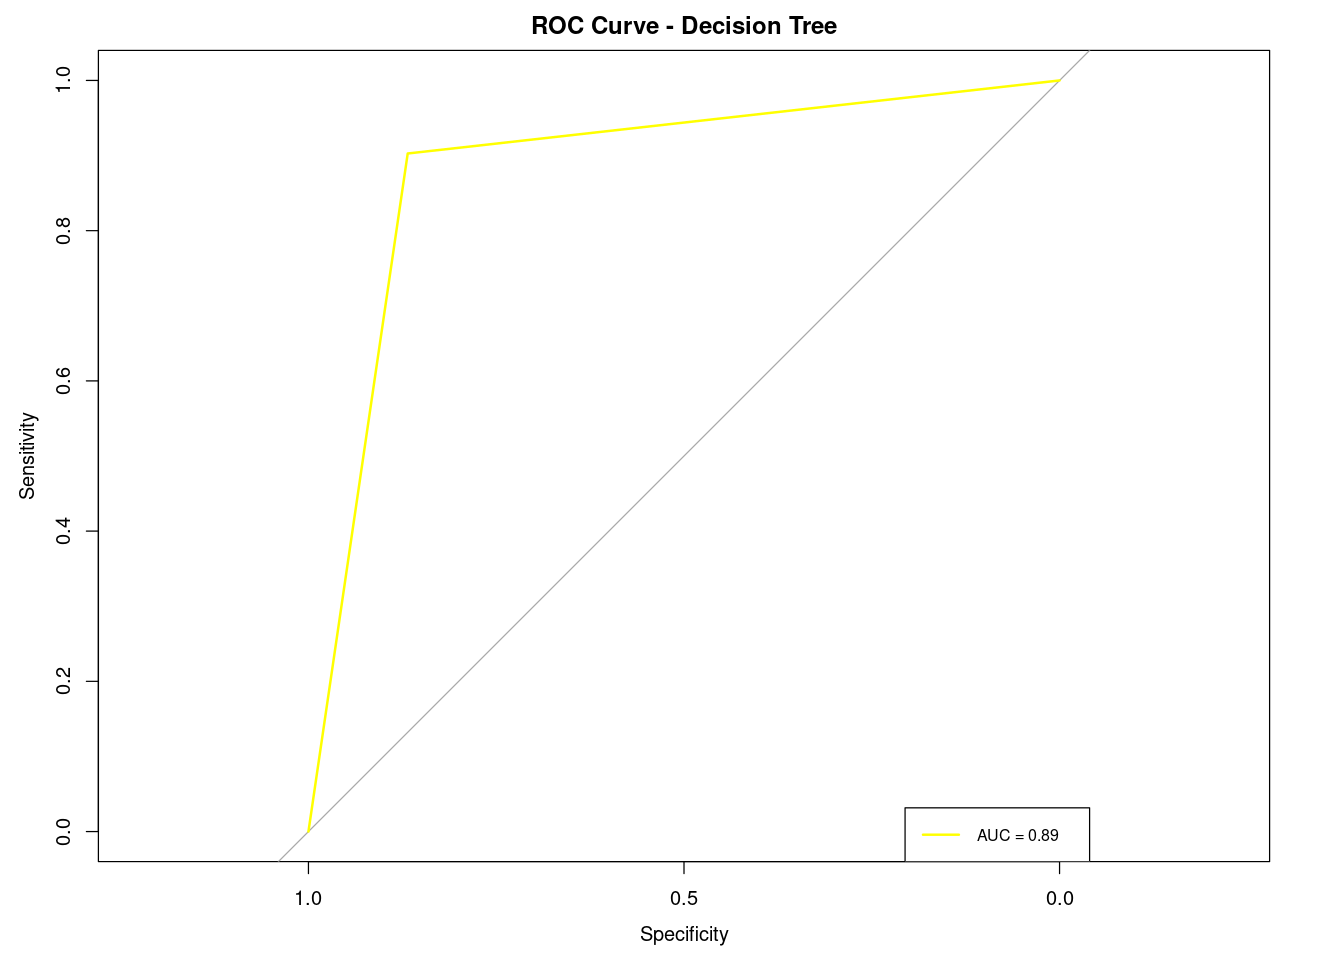

In [97]:
# Predictions on test data
test_predictions3 <- predict(fitted_tree_workflow, credit_card_test_data) %>%
  bind_cols(credit_card_test_data) %>%
  collect()

# ROC curve and AUC computation
roc_curve3 <- roc(test_predictions3$customer_status, as.numeric(test_predictions3$.pred_class))
auc_value3 <- auc(roc_curve3)

# Plot ROC curve
plot(roc_curve3, main = "ROC Curve - Decision Tree", col = "yellow", lwd = 2)
legend("bottomright", legend = paste("AUC =", round(auc_value3, 2)), col = "yellow", lwd = 2, cex = 0.8)

## Model 3 Training

In [99]:
qda_model<-discrim_quad() %>% 
  set_engine("MASS") %>% 
  translate()

qda_workflow <- workflow() %>%
  add_recipe(credit_recipe) %>%
  add_model(qda_model)

fitted_qda_workflow <- qda_workflow %>% fit(credit_card_train_data)

## Model 3 Performance Evaluation

Setting levels: control = closed_account, case = active

Setting direction: controls < cases



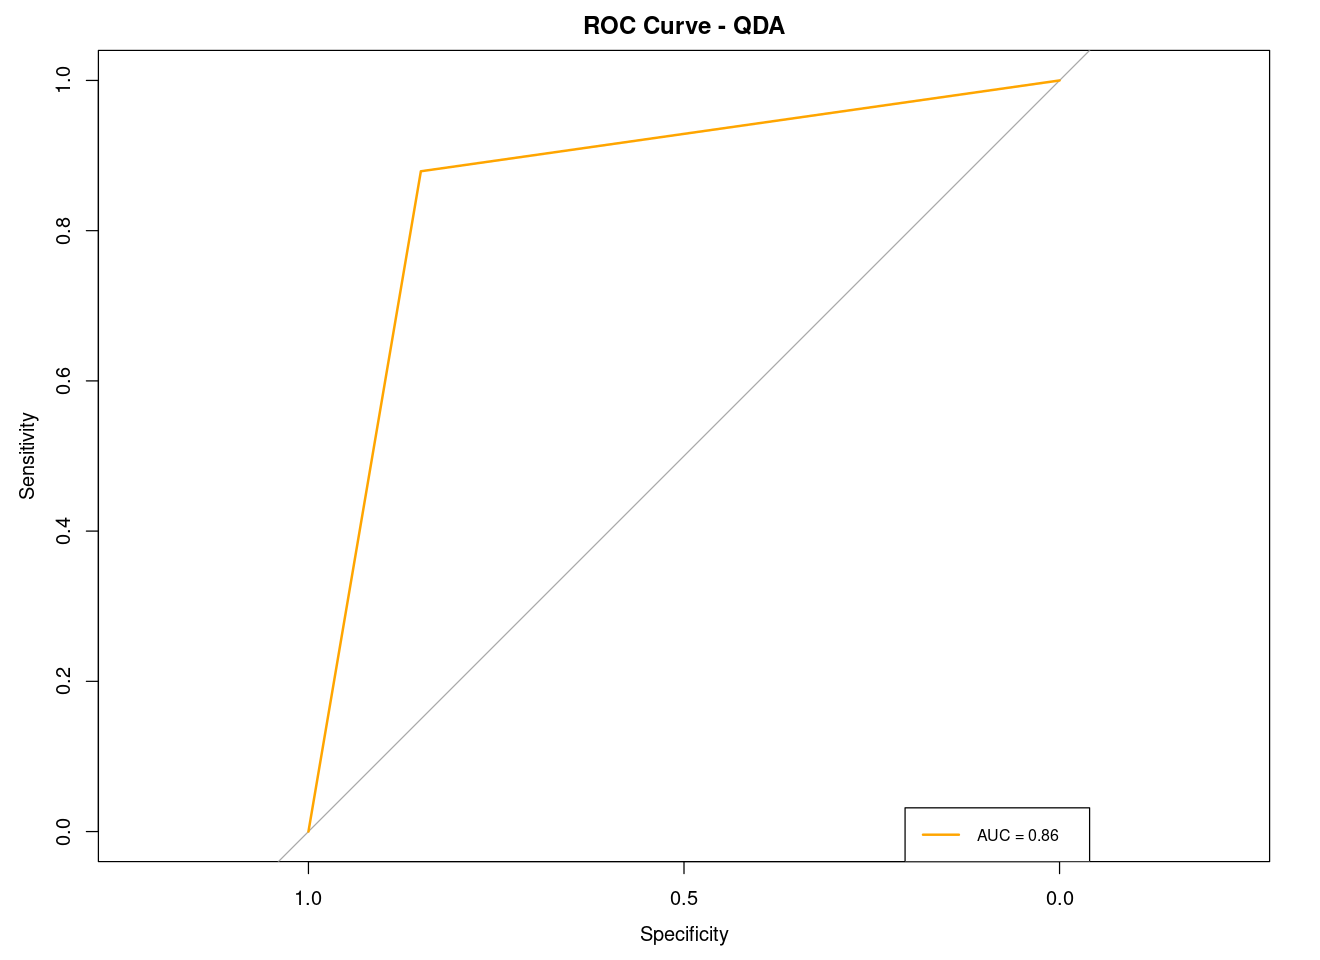

In [101]:
# Predictions on test data
test_predictions4 <- predict(fitted_qda_workflow, credit_card_test_data) %>%
  bind_cols(credit_card_test_data) %>%
  collect()

# ROC curve and AUC computation
roc_curve4 <- roc(test_predictions4$customer_status, as.numeric(test_predictions4$.pred_class))
auc_value4 <- auc(roc_curve4)

# Plot ROC curve
plot(roc_curve4, main = "ROC Curve - QDA", col = "orange", lwd = 2)
legend("bottomright", legend = paste("AUC =", round(auc_value4, 2)), col = "orange", lwd = 2, cex = 0.8)

# Executive Summary (25 Points)

Write an executive summary of your overall findings and recommendations to the executives at the bank. Think of this section as your closing remarks of a presentation, where you summarize your key findings, model performance, and make recommendations to improve customer retention and service at the ban

Your executive summary must be written in a [professional tone](https://www.universalclass.com/articles/writing/business-writing/appropriate-tone-in-business-communications.htm), with minimal grammatical errors, and should include the following sections:

1.  An introduction where you explain the business problem and goals of your data analysis

- What problem(s) is this company trying to solve? Why are they important to their future success?
- What was the goal of your analysis? What questions were you trying to answer and why do they matter?

2.  Highlights and key findings from your Exploratory Data Analysis section

- What were the interesting findings from your analysis and **why are they important for the business**?
- This section is meant to **establish the need for your recommendations** 
        in the following section

3. Your “best” classification model and an analysis of its performance 
	- In this section you should talk about the expected error of your model on future data
	 	- To estimate future performance, you can use your model performance results on the **test data**
    - You should discuss at least one performance metric, such as an F1, sensitivity, specificity, or ROC AUC for your model. However, you must explain the results in an **intuitive, non-technical manner**. Your audience in this case are executives at a telecommunications company with limited knowledge of machine learning.

4.  Your recommendations to the company

- Each recommendation must be supported by your data analysis results
- You must clearly explain **why** you are making each recommendation and which results from your data analysis support this recommendation
- You must also describe the potential business impact of your recommendation:
	- Why is this a good recommendation?
	- What benefits will the business achieve?

**Please add your executive summary in the text block below**

## Introduction

In this project, we're exploring how customers use credit cards at a big U.S. bank. We're trying to figure out why some customers close their accounts and if we can predict who might do it in the future. The bank is losing money because lots of people are closing their accounts, so they need to find ways to stop this from happening. We want to understand why customers leave and make predictions about who might leave next, so the bank can keep more customers and make more money.



## Key Findings
1) Customer Demographics and Account Closure:
Through comprehensive exploratory data analysis, we uncovered several noteworthy insights regarding the relationship between customer demographics and account closures:

Age and Marital Status: While there's a subtle correlation between older age and account closure, marital status also plays a role. Single and married individuals exhibit higher percentages of account closures compared to divorced individuals, suggesting potential lifestyle or financial dynamics at play.

Income and Education: Interestingly, customers with closed accounts have a slightly lower average income compared to those with active accounts. Furthermore, education level appears to influence account closure rates, with variations across different education categories. Further investigation is warranted to understand the nuanced relationships.

2) Financial Behavior and Account Closure:
Analysis of financial behavior metrics revealed compelling insights into customer account closures:

Credit Limit: Customers with closed accounts tend to have slightly lower average credit limits compared to active account holders. This underscores the importance of managing credit limits effectively to retain customers.

Spend and Transaction Patterns: While not explicitly addressed in the provided data, examining spending and transaction patterns could provide deeper insights into customer behavior and potential predictors of account closures.

3) Predictive Modeling & Recommendations: Developing predictive models is crucial for preemptive churn management. While initial analyses are promising, ongoing refinement is essential. Recommendations include targeted retention strategies, improved communication channels, and continuous model monitoring for adaptive strategies.

In summary, the analysis reveals important reasons why customers close their accounts, helping to develop strategies to keep them. Using data to make decisions, the bank can prevent financial losses and build better relationships with customers, leading to growth and profit over time. In a changing financial world, focusing on customer needs is crucial for success and staying competitive.

## Modeling Results

Among the models evaluated, the decision tree model emerged as the most effective for predicting customer account closures, boasting an Area Under the Receiver Operating Characteristic Curve (ROC AUC) of 0.89. The ROC AUC provides an intuitive measure of how well the model distinguishes between customers who close their accounts and those who do not.

This high ROC AUC suggests that the decision tree model has a strong ability to differentiate between customers likely to close their accounts and those likely to remain active. This means that the model can help the company identify at-risk customers more accurately, reducing the potential financial losses associated with account closures.


## Recommendations

1)Targeted Customer Engagement:

Implement targeted engagement strategies based on demographic characteristics such as age, marital status, and education level to proactively address customer concerns and enhance satisfaction.

2) Use the Decision Tree Model to Keep Customers:

The decision tree model is really good at figuring out which customers might leave. So, the company should use this model to find those customers early and try to keep them.

Business Impact: By leveraging the decision tree model, the company can potentially reduce customer churn rates, thereby preserving revenue streams and enhancing long-term profitability.

3) Make Customers Feel Special:

Look at what the decision tree tells us about different kinds of customers. Then, make special deals or offers for those who might leave. Treat them extra nicely.

Business Impact: Personalized engagement can foster stronger customer relationships, leading to increased customer loyalty and lifetime value, ultimately driving revenue growth for the company.

4) Help Customers Better:

If a customer seems unhappy or might leave, reach out to them early. Solve their problems quickly and make them feel heard and cared for.

Business Impact: Improved customer service can enhance overall customer satisfaction and retention rates, reducing the likelihood of account closures and preserving revenue streams for the company.

5) Keep Learning and Improving:

Keep an eye on how well the decision tree model works. If things change or new patterns emerge, update the model to keep it accurate.
